In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
%matplotlib inline

# Transactions from 09/27/19 - 09/17/21 Review

# Load and clean the datasets

In [223]:
pwd = os.getcwd()
card1_df = pd.read_csv(pwd + '/2019_2021_Card_1.csv')
card2_df = pd.read_csv(pwd + '/2019_2021_Card_2.csv')

## Clean dataset #1

In [224]:
# cleans the data from unwanted rows from first Card Dataset
categories_to_drop = ['Payment', 'Return']
card1_df_modified = card1_df.copy()
for category in categories_to_drop:
    card1_df_modified = card1_df_modified[card1_df_modified['Type'] != category]

# drop the whole 'Type' column after dropping the unwanted rows based on type
card1_df_modified = card1_df_modified.drop(columns='Type')

## Clean dataset #2

In [225]:
# drop rows with these categories
categories_to_drop = ['Payments and Credits','Awards and Rebate Credits','Interest']
card2_df_modified = card2_df.copy()
for category in categories_to_drop:
    card2_df_modified = card2_df_modified[card2_df_modified['Category'] != category]

## After cleaning, combine both datasets into one dataframe

In [226]:
# Concatenated both dataframes into one
combined_df = pd.concat([card1_df_modified, card2_df_modified], ignore_index=True, sort=True)

# Change the datatype of the date column to datetime and sort by date
combined_df['Trans. Date'] = pd.to_datetime(combined_df['Trans. Date'])
combined_df_sorted = combined_df.sort_values('Trans. Date').reset_index()

# Which category did I spend the most money on?

In [227]:
# Creates a dataset that compiles the total of money spent in each category
category_sum_df = combined_df.groupby('Category')[['Amount']].sum()
category_sum_df.sort_values('Amount',ascending=False)

,Amount
Category,
Shopping,8827.06
Education,3480.77
Bills & Utilities,2536.35
Food & Drink,1813.88
Health & Wellness,750.50
Automotive,675.36
Groceries,427.39
Gas,411.84
Entertainment,292.82


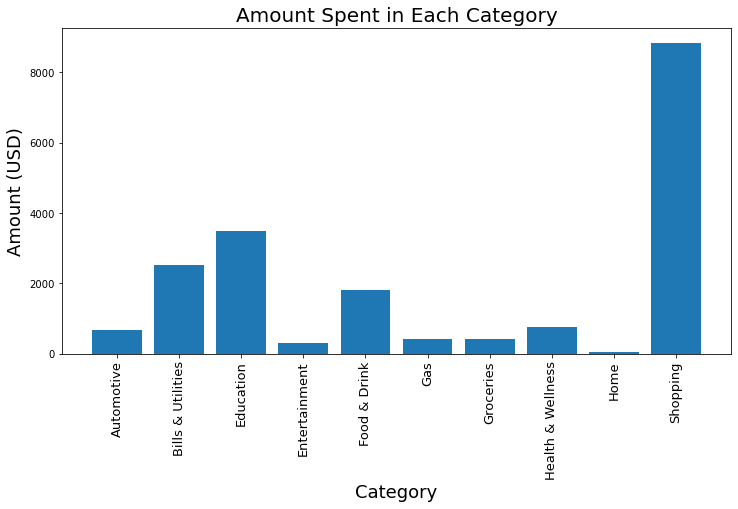

In [228]:
# visualizes the spending in each category and we see
# that shopping was the biggest cash vacuum.... by a lot

categories = [category for category, df in combined_df.groupby('Category')]
plt.figure(figsize=(12,6))
plt.bar(categories,category_sum_df['Amount'])
plt.xticks(categories,rotation='vertical', size=13)
plt.title('Amount Spent in Each Category', size=20)
plt.xlabel('Category', size=18)
plt.ylabel('Amount (USD)', size=18);

- Shopping is, by far, the highest totaled amount, over twice as much as the next in line
    - Made big purchases over the past two years (electronics, furniture, etc.)
- Education is second with purchases like tuition and access to homework websites

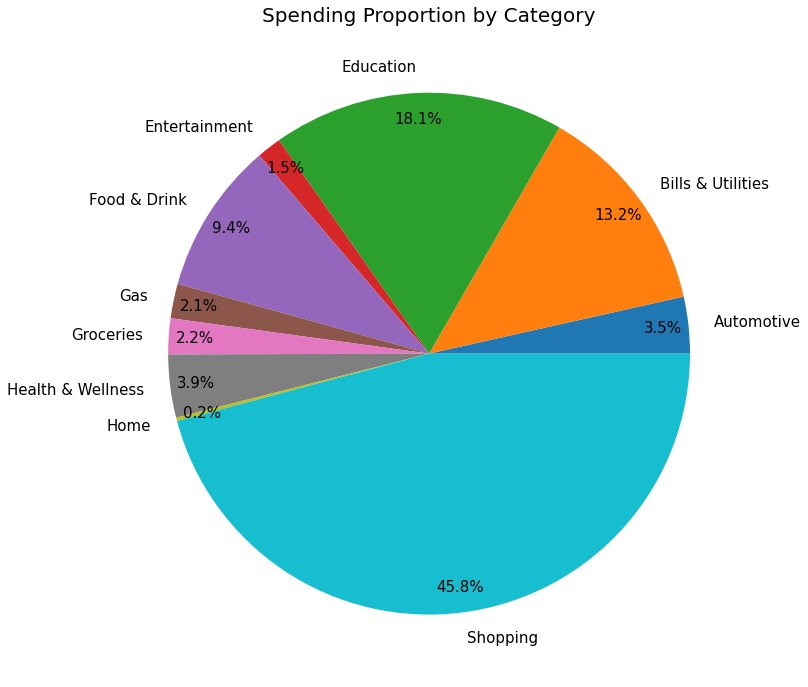

In [229]:
# Another method of visualizing the weight of each category
plt.figure(figsize=(24,12), facecolor='white')
plt.pie(category_sum_df['Amount'],
        labels=categories,
        autopct='%1.1f%%', pctdistance=0.9,
        textprops={'fontsize':15})
plt.title('Spending Proportion by Category', size=20);

# Which company did I spend the most on within the Shopping category?

In [230]:
# shows the amount spent with each company within the shopping category
shopping_transactions_df = combined_df[combined_df['Category'] == 'Shopping']
sum_of_shopping_transactions = shopping_transactions_df.groupby('Description')[['Amount']].sum().sort_values('Amount', ascending=False).reset_index()
sum_of_shopping_transactions

,Description,Amount
0,AMAZON,2226.86
1,NZXT,1795.46
2,APPLE,1302.70
3,MICRO CENTER,624.98
4,GEOLOGIE SKINCARE,504.89
5,STAPLES,439.49
6,NEWEGG,428.40
7,MERCARI,404.38
8,WALGREENS,273.68
9,DICK'S SPORTING GOODS,187.63


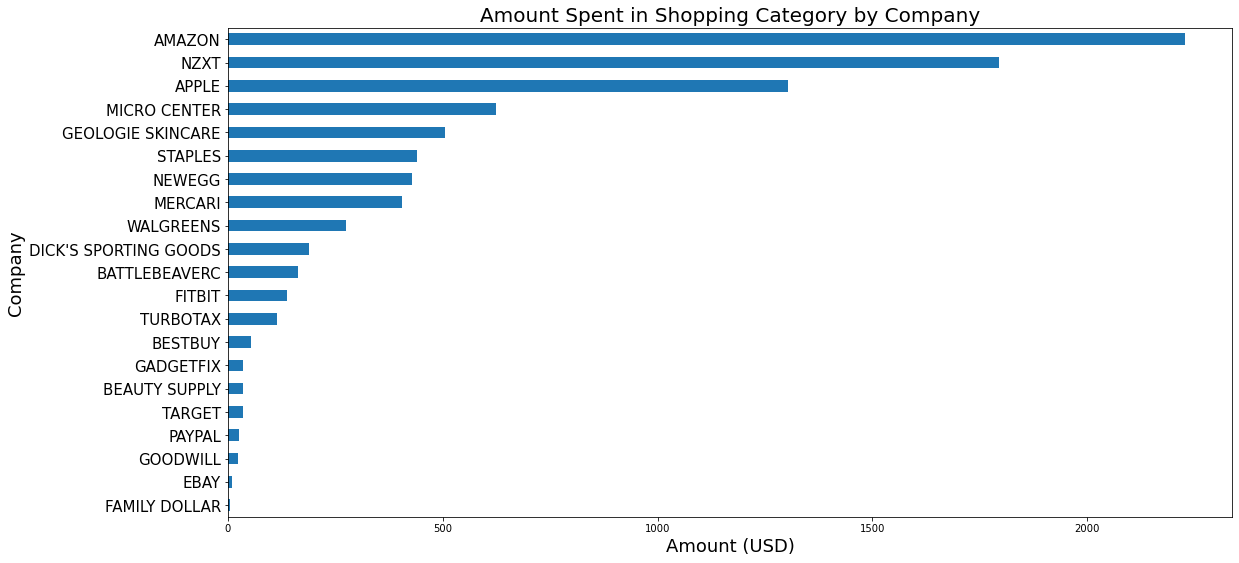

In [231]:
# Visualizes the table shown above

ax = sum_of_shopping_transactions.sort_values('Amount', ascending=True).plot.barh(x='Description',
                                                                                  figsize=(18,9), 
                                                                                  grid=False, 
                                                                                  legend=False)
plt.title('Amount Spent in Shopping Category by Company', size=20)
plt.yticks(size=15)
plt.xlabel('Amount (USD)', size=18)
plt.ylabel('Company', size=18);

- Amazon has the highest total of all, followed by NZXT and Apple
    - Amazon is a go-to for buying things, due to their speed, price, and convenience
- I bought a PC from NZXT (which also explains Micro Center)
- I also bought an iPad (with accessories) from Apple

# Which month is my highest spending month?

## Create extra columns for year, month, and day

In [232]:
# Created a copy to work with in case I mess the dataset up
combined_df_modified = combined_df.copy()
combined_df_modified['Year'] = combined_df_modified['Trans. Date'].dt.year
combined_df_modified['Month'] = combined_df_modified['Trans. Date'].dt.month
combined_df_modified['Day'] = combined_df_modified['Trans. Date'].dt.day

In [233]:
# Create a dataset with the totals for each month in their respective years
monthly_totals_df = combined_df_modified.groupby(['Year','Month']).agg({'Amount': 'sum'})
monthly_totals_df

Amount
Year Month         
2019 9        12.34
     10      473.47
     11      717.76
     12      778.97
2020 1      1041.99
     2       602.41
     3       631.96
     4       604.09
     5       120.60
     6       239.22
     7       140.61
     8       418.23
     9       622.54
     10     1972.58
     11      394.55
     12      838.73
2021 1       802.10
     2       735.09
     3      2827.51
     4      2175.56
     5       448.93
     6       682.35
     7       787.09
     8       863.14
     9       325.69

In [234]:
# Pivot dataset so each column represents a month, each row represents a year,
# and each cell contains sum of all transactions made in the respective year/month
monthly_totals_df_pivoted = pd.pivot_table(monthly_totals_df,values="Amount",index="Year",
                                           columns="Month",aggfunc=np.sum)
monthly_totals_df_pivoted

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.34,473.47,717.76,778.97
2020,1041.99,602.41,631.96,604.09,120.60,239.22,140.61,418.23,622.54,1972.58,394.55,838.73
2021,802.10,735.09,2827.51,2175.56,448.93,682.35,787.09,863.14,325.69,NaN,NaN,NaN


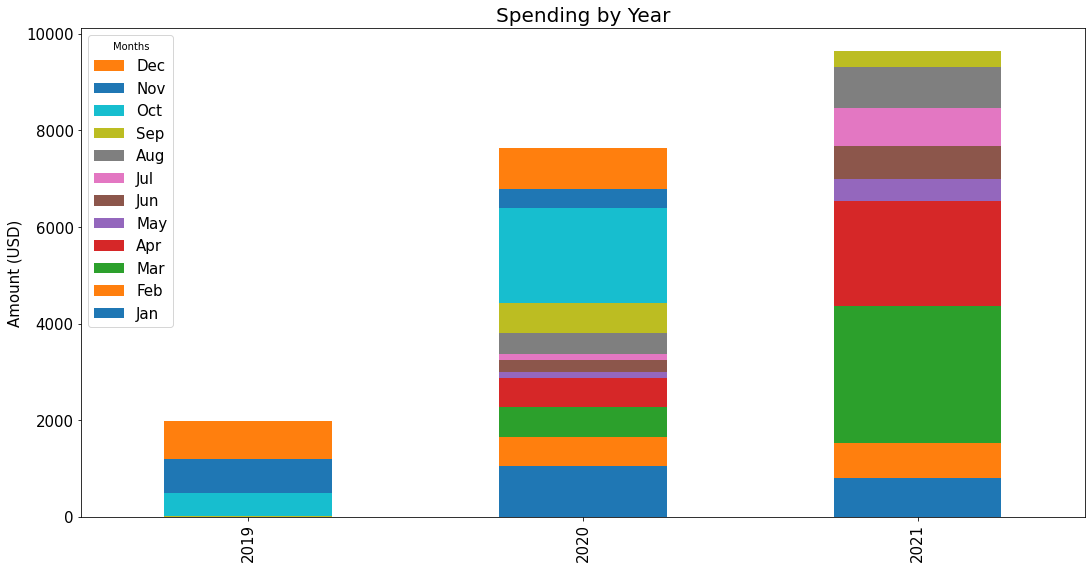

In [235]:
# Visualize the pivoted table above
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Creates a stacked bar plot
ax = monthly_totals_df_pivoted.reset_index().plot.bar(x='Year', stacked=True, figsize=(18,9))

# Plots were stacked upside down so I reversed the legend and the list of months above and put it in the new legend
handles, labels= ax.get_legend_handles_labels()
ax.legend(handles[::-1], months[::-1], title='Months', loc='upper left', fontsize='15')

plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Spending by Year',size=20)
plt.xlabel(None)
plt.ylabel('Amount (USD)',size=15);

- Seems like March 2021 is the month which I spent the most money, but second place seems hard to tell between October 2020 and April 2021
- Even though 2021 is not over yet, I had already surpassed last year's spending by over \\$1,000 with 3 month's left to spare
- Seeing stacked bars may prove hard to tell how months rank against each other

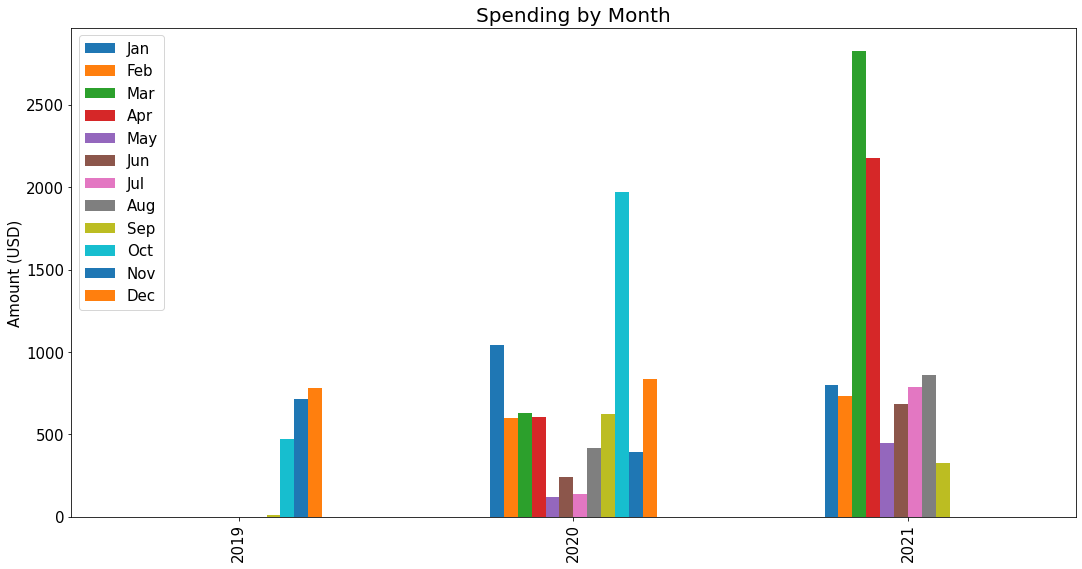

In [236]:
# Another chart to visualize

# Creates a chart similar to the stacked bar plot, but now unstacked
monthly_totals_df_pivoted.plot.bar(figsize=(18,9))
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Spending by Month', size=20)
plt.xlabel(None)
plt.ylabel('Amount (USD)', size = 15)
plt.legend(months, loc='upper left', fontsize=15);


### March, 2021 is the highest totaled month, let us look at the purchases

In [237]:
# Show transactions during March 2021
combined_df_modified.loc[(combined_df_modified['Month']==3) & (combined_df_modified['Year']==2021)].sort_values('Trans. Date').reset_index()

,index,Amount,Category,Description,Trans. Date,Year,Month,Day
0,47,124.90,Bills & Utilities,AT&T,2021-03-01,2021,3,1
1,48,253.74,Automotive,CAR MAINTENANCE,2021-03-06,2021,3,6
2,296,90.56,Groceries,PETCO,2021-03-06,2021,3,6
3,295,6.92,Shopping,AMAZON,2021-03-06,2021,3,6
4,49,16.25,Food & Drink,FASTFOOD,2021-03-07,2021,3,7
5,297,14.87,Shopping,AMAZON,2021-03-07,2021,3,7
6,50,24.85,Food & Drink,DOORDASH,2021-03-11,2021,3,11
7,51,11.98,Food & Drink,DELI,2021-03-12,2021,3,12
8,298,4.99,Entertainment,APPLE MUSIC,2021-03-13,2021,3,13
9,52,23.06,Food & Drink,DOORDASH,2021-03-14,2021,3,14


- March 2021 was the highest month
    - It makes sense because I bought a PC during that month (index 11 in March's dataset), which covers over half of the overall sum (63.5%)
- The following month was second highest with big purchases to Micro Center and Amazon
    - Likely accessories/additions to the PC
- Steep decline, and then slow progression in spending after April 2021
    - Saving more than usual might've been a reaction to get my balance up to where I'm comfortable again
- Ignoring, 2019, my lowest month was May 2020
    - Can't guess as to why May 2020 would be the lowest overall, but I would assume Covid-19 Lockdowns would be a factor

# What does all this mean?

- A big portion of my money goes to the Shopping category, so if I want to save more, that should be the first place I look
- Amazon is a little too convenient for me, making it too easy for me to spend money
- There seems to be no pattern to predict when I would make big purchases, but, reasonably, after making big purchases, I would refrain from making more the following month
    - I can implement something to trick my brain into thinking I spent a big amount the previous month, thus making me want to save more
- My monthly average spending is around $770, which can be lowered drastically by monitoring my spending, and not giving in to impromptu large purchases
